# 2D Lid-Driven Cavity Flow (Navier–Stokes Simulation)

The lid-driven cavity flow is a classical CFD benchmark problem.  
We solve the 2D incompressible Navier–Stokes equations inside a unit square:

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} 
= -\frac{1}{\rho}\frac{\partial p}{\partial x} + \nu \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)
$$

$$
\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} 
= -\frac{1}{\rho}\frac{\partial p}{\partial y} + \nu \left( \frac{\partial^2 v}{\partial x^2} + \frac{\partial^2 v}{\partial y^2} \right)
$$

$$
\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} = 0
$$

- Domain: $0 \leq x,y \leq 1$  
- Boundary conditions:
  - Top lid: $u = 1, v = 0$  
  - Other walls: $u = v = 0$ (no-slip)  
- Method: finite difference projection method  
- Visualization: streamlines and quiver plots of velocity field  

This is the standard CFD test case and a first step toward Navier–Stokes solvers

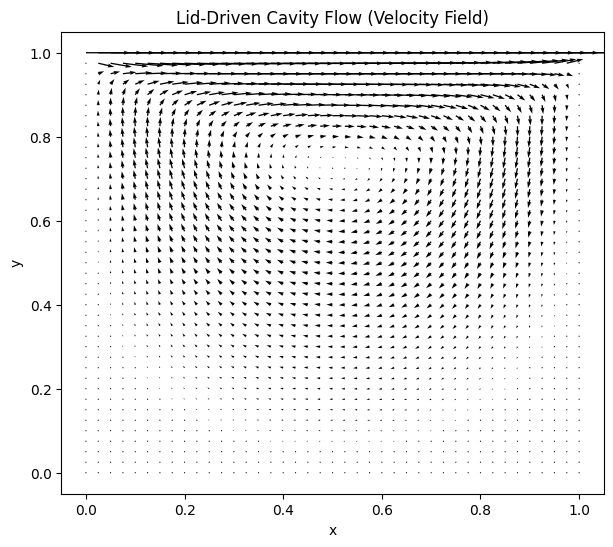

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
nx, ny = 41, 41
dx, dy = 1/(nx-1), 1/(ny-1)
nt = 500
dt = 0.001
rho = 1.0
nu = 0.1

# Fields
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx))
b = np.zeros((ny, nx))

# Build RHS of pressure Poisson
def build_up_b(b, u, v, dx, dy, dt, rho):
    b[1:-1,1:-1] = (rho * (1/dt *
        ((u[1:-1,2:] - u[1:-1,0:-2]) / (2*dx) +
         (v[2:,1:-1] - v[0:-2,1:-1]) / (2*dy)) -
        ((u[1:-1,2:] - u[1:-1,0:-2]) / (2*dx))**2 -
          2*((u[2:,1:-1] - u[0:-2,1:-1]) / (2*dy) *
             (v[1:-1,2:] - v[1:-1,0:-2]) / (2*dx)) -
        ((v[2:,1:-1] - v[0:-2,1:-1]) / (2*dy))**2))
    return b

# Pressure Poisson solver
def pressure_poisson(p, dx, dy, b, nit=50):
    for q in range(nit):
        pn = p.copy()
        p[1:-1,1:-1] = (((pn[1:-1,2:] + pn[1:-1,0:-2])*dy**2 +
                         (pn[2:,1:-1] + pn[0:-2,1:-1])*dx**2) /
                        (2*(dx**2 + dy**2)) -
                        dx**2*dy**2/(2*(dx**2 + dy**2))*b[1:-1,1:-1])
        
        # Boundary conditions
        p[:,-1] = p[:,-2]   # dp/dx = 0 at x = 1
        p[:,0]  = p[:,1]    # dp/dx = 0 at x = 0
        p[-1,:] = 0         # p = 0 at y = 1
        p[0,:]  = p[1,:]    # dp/dy = 0 at y = 0
    return p

# Time stepping
for n in range(nt):
    un = u.copy()
    vn = v.copy()

    b = build_up_b(b, u, v, dx, dy, dt, rho)
    p = pressure_poisson(p, dx, dy, b)
    
    u[1:-1,1:-1] = (un[1:-1,1:-1] -
                    un[1:-1,1:-1]*(dt/dx)*(un[1:-1,1:-1] - un[1:-1,0:-2]) -
                    vn[1:-1,1:-1]*(dt/dy)*(un[1:-1,1:-1] - un[0:-2,1:-1]) -
                    dt/(2*rho*dx)*(p[1:-1,2:] - p[1:-1,0:-2]) +
                    nu*((dt/dx**2)*(un[1:-1,2:] - 2*un[1:-1,1:-1] + un[1:-1,0:-2]) +
                        (dt/dy**2)*(un[2:,1:-1] - 2*un[1:-1,1:-1] + un[0:-2,1:-1])))

    v[1:-1,1:-1] = (vn[1:-1,1:-1] -
                    un[1:-1,1:-1]*(dt/dx)*(vn[1:-1,1:-1] - vn[1:-1,0:-2]) -
                    vn[1:-1,1:-1]*(dt/dy)*(vn[1:-1,1:-1] - vn[0:-2,1:-1]) -
                    dt/(2*rho*dy)*(p[2:,1:-1] - p[0:-2,1:-1]) +
                    nu*((dt/dx**2)*(vn[1:-1,2:] - 2*vn[1:-1,1:-1] + vn[1:-1,0:-2]) +
                        (dt/dy**2)*(vn[2:,1:-1] - 2*vn[1:-1,1:-1] + vn[0:-2,1:-1])))

    # Boundary conditions
    u[0,:]  = 0
    u[:,-1] = 0
    u[:,0]  = 0
    u[-1,:] = 1   # moving lid
    
    v[0,:]  = 0
    v[-1,:] = 0
    v[:,0]  = 0
    v[:,-1] = 0

# Visualization
X, Y = np.meshgrid(np.linspace(0,1,nx), np.linspace(0,1,ny))
plt.figure(figsize=(7,6))
plt.quiver(X, Y, u, v)
plt.title("Lid-Driven Cavity Flow (Velocity Field)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## ✅ Conclusion

- The simulation reproduces the classic vortex structure of lid-driven cavity flow.  
- The projection method ensures incompressibility by solving the pressure Poisson equation.  
- Increasing resolution (`nx, ny`) and Reynolds number $`Re = 1/nu`$ shows more complex flow patterns.  
- This is a benchmark CFD problem and the foundation for more advanced Navier–Stokes solvers.